In [2]:
import networkx as nx
import matplotlib.pyplot as plt

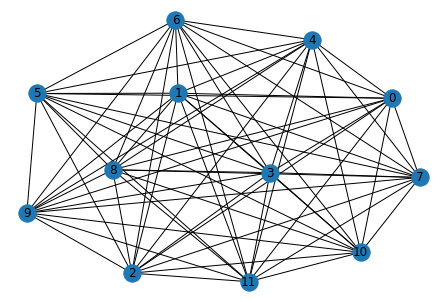

In [3]:
cG = nx.complete_graph(12)
nx.draw(cG, with_labels = True)
plt.savefig('completeGraph.png')

In [4]:
G = nx.Graph()
G.add_node(1)
l1 = [2,3,4,5,6]
G.add_nodes_from(l1)

n1= [ 'A', 'B', 'C', 'D']
G.add_nodes_from(n1)

In [5]:
G.add_edge( 1,2)
G.add_edge('A','B')
edge_list = [(1,6), (2,3), (3,4), (2,6), (6,5) ]
edge_list2 = [ ('A', 'D'), ('B', 'C'), ('B', 'D')]
G.add_edges_from(edge_list)
G.add_edges_from(edge_list2)

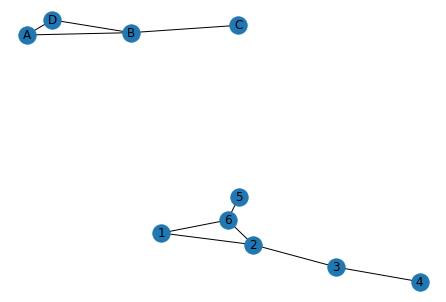

In [6]:
nx.draw(G, with_labels = True)

In [9]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D'))

In [114]:
G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')])

In [11]:
G.order()

10

In [12]:
G.degree

DegreeView({1: 2, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 'A': 2, 'B': 3, 'C': 1, 'D': 2})

In [13]:
print(G.neighbors(2))
print(list(G.neighbors(2)))

[1, 3, 6]


In [11]:
G.number_of_edges()

10

In [129]:
nb_edges = G.number_of_edges()
nb_edges

10

In [14]:
total = 0
for n in G.nodes():
    nb  = G.degree(n) 
    total += nb
print(total)

20


In [15]:
G.edges()


EdgeView([(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')])

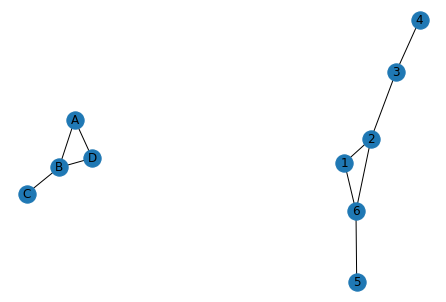

In [16]:
G_from_file = nx.read_edgelist('./graph.edges', nodetype=str)
nx.draw(G_from_file, with_labels = True)

In [17]:
nx.write_edgelist(G, "graph.edges2")

In [51]:
nx.write_graphml_lxml(G, "./graph.graphml")

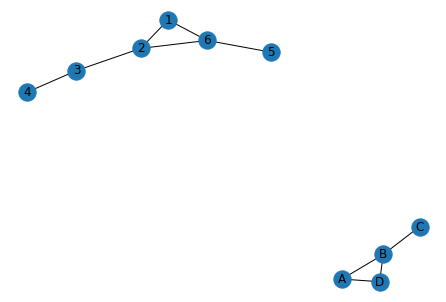

In [52]:
nx.draw(G, with_labels = True)

In [23]:
l = set(nx.bfs_edges(G,5))
print('BFS: ', l)

BFS:  {(6, 2), (3, 4), (6, 1), (2, 3), (5, 6)}


In [22]:
l = set(nx.dfs_edges(G,1))
print('DFS', l)

DFS {(1, 2), (3, 4), (6, 5), (2, 3), (2, 6)}


In [34]:
import random 

def is_connected(G):
    Nodes_set =set(G.nodes())
    rand_node1 = Nodes_set.pop()
#dfs_edges  return list of tuples [ (a,b), (c,d), ...] take 2nd element b,d,  and add the first start element and test
#and transfrom to set
    visited = set(item[1] for item in list(nx.dfs_edges(G,rand_node1)))                      
    visited.add(rand_node1) #visited does not contain the start node
    Nodes_set.add(rand_node1) # rand_node was poped from Nodes_set
    if visited == Nodes_set: # if the visited nodes are equal to whole graph
        print("The Graph is connected.")
    else:
        print("The Graph is not connected, these are the components:")

        N.add(rand_node1)
        i = 1 
        while len(Nodes_set)!=0:
            visited = {}
            rand_node = Nodes_set.pop()
            visited = set( item[1] for item in list(nx.dfs_edges(G,rand_node)))
            visited.add(rand_node)
            print("The component number" , i , "is: ", visited)
            i += 1
            Nodes_set = Nodes_set - visited

    

In [35]:
is_connected(G)

The Graph is connected.


In [217]:
M = nx.adjacency_matrix(G)
print('adjancy matrix of G: ', M     )

#The adjancency_matrix function returns a sparse matrix representation
# containing only the non zero elements with their i and j in the matrix

adjancy matrix of G:    (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 4)	1
  (6, 7)	1
  (6, 9)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 7)	1
  (9, 6)	1
  (9, 7)	1


In [24]:
M = nx.attr_matrix(G, rc_order = [1,2,3,4,5,6,'A', 'B', 'C', 'D'])
print('adjacency matrix of G:', M)

adjacency matrix of G: [[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]


In [25]:
#transitive closure
from numpy import *
n = G.order()
I = eye(n,n)
TC = (I+M)**(n-1)
TC

#TC shows if there is a path between node i and node j after (n-1) iterations,
# wich means, a path of length n-1, wich means if there axists finally a path.

matrix([[11535., 13639.,  7071.,  2983.,  5697., 13250.,     0.,     0.,
             0.,     0.],
        [13639., 16219.,  8566.,  3699.,  6682., 15637.,     0.,     0.,
             0.,     0.],
        [ 7071.,  8566.,  4791.,  2211.,  3372.,  8056.,     0.,     0.,
             0.,     0.],
        [ 2983.,  3699.,  2211.,  1092.,  1374.,  3372.,     0.,     0.,
             0.,     0.],
        [ 5697.,  6682.,  3372.,  1374.,  2855.,  6568.,     0.,     0.,
             0.,     0.],
        [13250., 15637.,  8056.,  3372.,  6568., 15234.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  8836., 10336.,
          4760.,  8836.],
        [    0.,     0.,     0.,     0.,     0.,     0., 10336., 12096.,
          5576., 10336.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  4760.,  5576.,
          2576.,  4760.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  8836., 10336.,
          4760.,  8836.]])

In [228]:
TC_b = mat(TC, dtype=bool)
TC_b

#TC_b shows by 0 or 1 if there exists a path of any length between node i 
#and node j according to the order given in the nx.attr_matrix


matrix([[ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True]])

In [65]:
#15
def function(G,s):
    F = []
    order = 1
    mark = {}
    for i in G.nodes():
        mark[i] = -1
    mark[s] = order
    F.append(s)
    while F:
        x = F.pop(0)
        for y in G.neighbors(x):
            if mark[y] == -1:
                F.append(y)
                order = order + 1
                mark[y] = order
    return mark

In [66]:
function(G,'A')

{1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 'A': 1, 'B': 2, 'C': 4, 'D': 3}

In [ ]:
#This function visits all the nodes connected to s, according to BFS 
# Algorithm, starting from s 
# and outputs the order of visit of the nodes

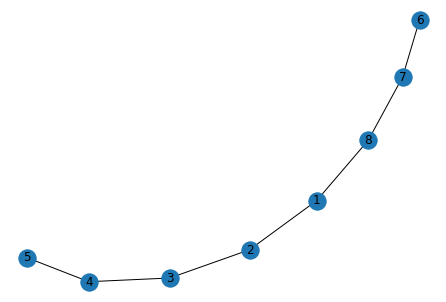

In [91]:
l2 = [ (1,2),(2,3),(3,4),(4,5),(6,7),(7,8), (8,1)]
Gtest = nx.Graph()
Gtest.add_edges_from(l2)
nx.draw(Gtest, with_labels = True)

In [129]:
#16

def is_Acyclic(G,s):
    F = []
    mark = {}
    pred = {}
    order = 1
    for i in G.nodes():
        mark[i] = -1
        pred[i] = s
    F.append(s)
    mark[s] = order #missing in the pseudocode
    
    while F:
        x = F.pop(0)
        #print(x, mark[x])
        for y in G.neighbors(x):
            if mark[y] == -1:
                F.append(y)
                order = order + 1
                mark[y] = order
                pred[y] = x
            elif pred[x] != y:
                #print(x, y, order)
                return False
    return True

In [132]:
print(is_Acyclic(Gtest, 4))
print(is_Acyclic(G, 1))
print(is_Acyclic(cG, 5))

True
False
False


In [77]:
#17 

G['B']['A']['weight']=4  #add a weight to the edge B-A
G.nodes[1]['color']='red' #adds a color to the node 1

In [76]:
print(G.nodes(data=True))

[(1, {'color': 'red'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), ('A', {}), ('B', {}), ('C', {}), ('D', {})]


In [78]:
print(G.edges(data=True))

[(1, 2, {}), (1, 6, {}), (2, 3, {}), (2, 6, {}), (3, 4, {}), (5, 6, {}), ('A', 'B', {'weight': 4}), ('A', 'D', {}), ('B', 'C', {}), ('B', 'D', {})]


In [141]:
#18

WG = nx.read_edgelist('./WG.txt', create_using = nx.DiGraph(), nodetype=str,data= ( ('weight', int),) )

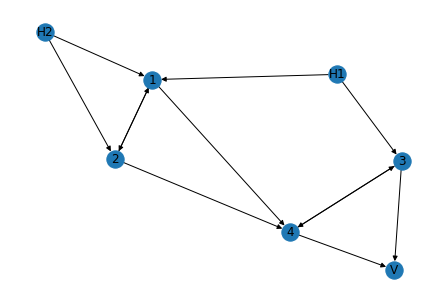

In [142]:
nx.draw(WG, with_labels= True )

In [143]:
WG.edges(data=True)


OutEdgeDataView([('H1', '1', {'weight': 2}), ('H1', '3', {'weight': 8}), ('1', '2', {'weight': 1}), ('1', '4', {'weight': 5}), ('3', '4', {'weight': 2}), ('3', 'V', {'weight': 3}), ('H2', '1', {'weight': 7}), ('H2', '2', {'weight': 5}), ('2', '1', {'weight': 3}), ('2', '4', {'weight': 3}), ('4', '3', {'weight': 1}), ('4', 'V', {'weight': 5})])

In [ ]:
#DIJIKSTRA
#19

